### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

## <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from matplotlib import pyplot as plt

data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')
data=data.iloc[:,1:] ### removing the date column

In [4]:
data.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [5]:
data.shape

(2906, 23)

## 1. Exploring the data 
By exploring we are trying to check for different type of data we have in our dataset. We are plotting histograms for different variables to understand the distribution of data. This will help us in understanding the operations to be performed. For exploring we are using decribe() function. For checking the collinearity we are ploting heat map which will help us in understanding which variables are collinear.


In [6]:
data.dtypes
print (data.describe ())## finding the null values in the dataset

       btc_market_price  btc_total_bitcoins  btc_market_cap  btc_trade_volume  \
count       2906.000000        2.879000e+03    2.906000e+03      2.885000e+03   
mean         839.104218        1.151138e+07    1.344255e+10      7.398381e+07   
std         2304.972497        4.200024e+06    3.866150e+10      2.924228e+08   
min            0.000000        2.043200e+06    0.000000e+00      0.000000e+00   
25%            6.653465        8.485300e+06    5.363081e+07      2.916456e+05   
50%          235.130000        1.243115e+07    3.346869e+09      1.001414e+07   
75%          594.191164        1.520051e+07    8.075525e+09      2.834038e+07   
max        19498.683330        1.683769e+07    3.265250e+11      5.352016e+09   

       btc_blocks_size  btc_avg_block_size  btc_n_orphaned_blocks  \
count      2877.000000         2906.000000            2906.000000   
mean      35505.502848            0.350366               0.364074   
std       43618.633821            0.353168               0.8422

## Plotting the data

Plotting the data to understand the distribution and multicollinearity of the data.  

## Correlation Heat Map

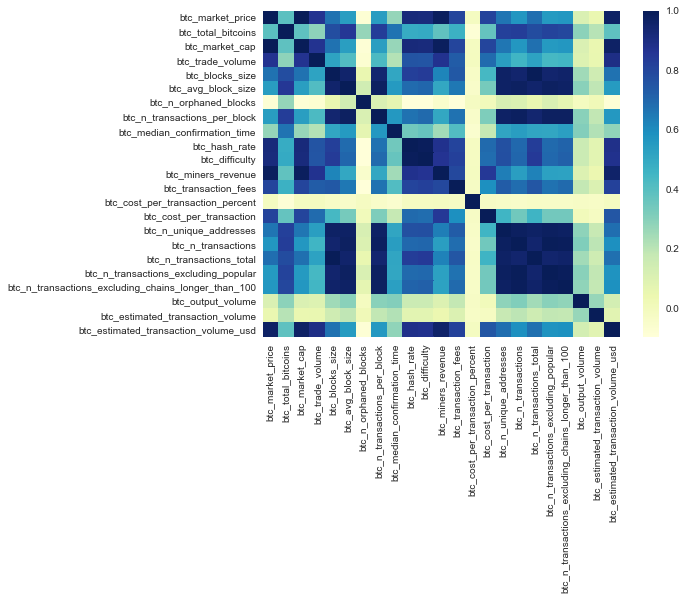

In [14]:
import seaborn as sns; sns.set()
corr = data.corr()
plt.figure(figsize = (8,6))
ax = sns.heatmap(corr, cmap="YlGnBu")

The heatmap details the correlation among all the variables. Based on the color we can understand how various variables are correlated with our depedent variable 

## Histogram distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6C39B0>,
      dtype=object)

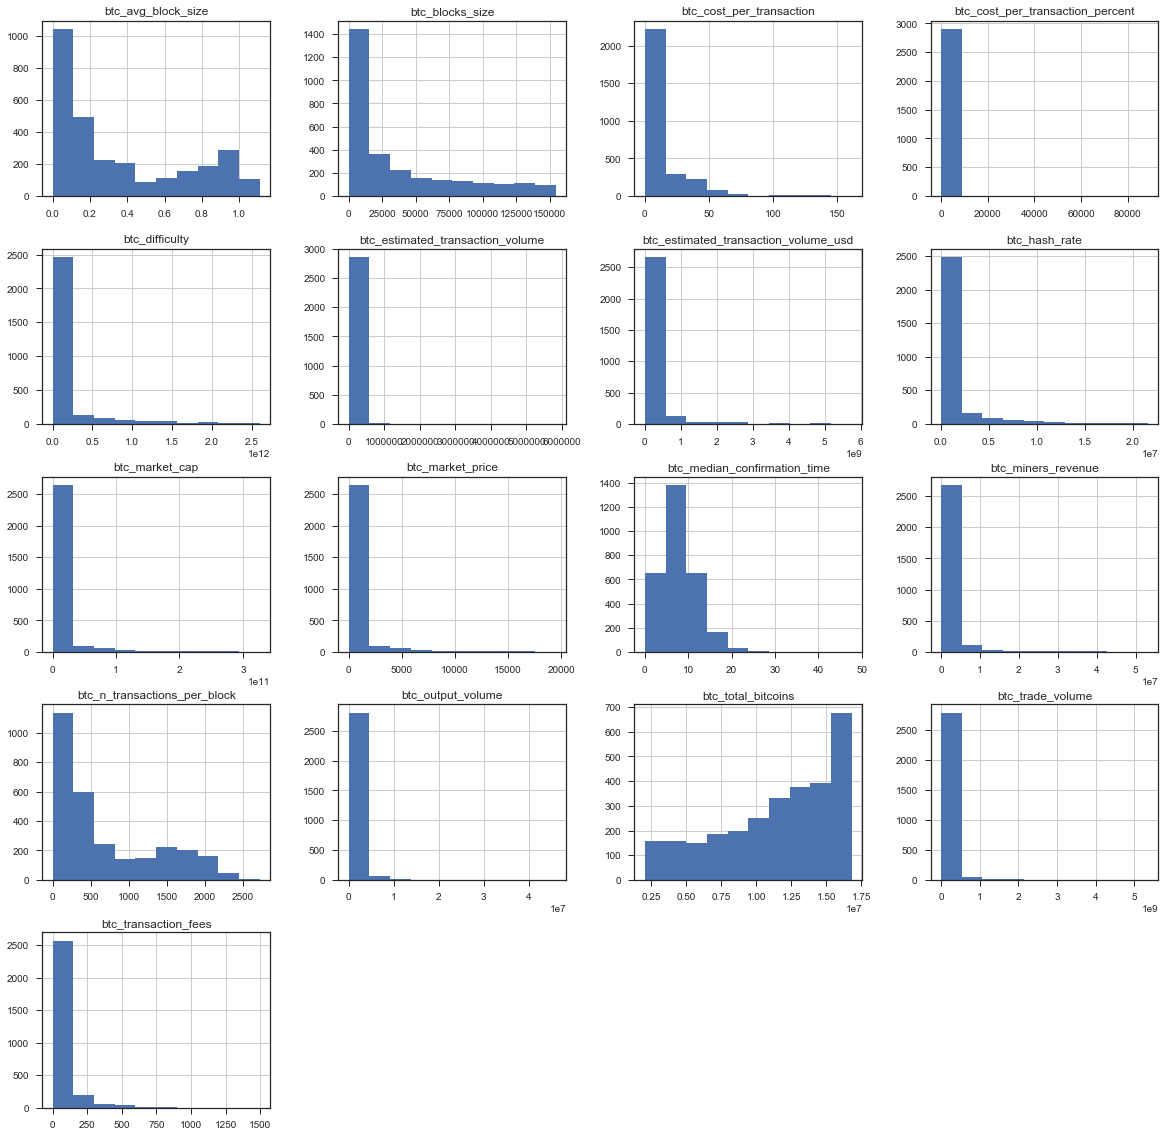

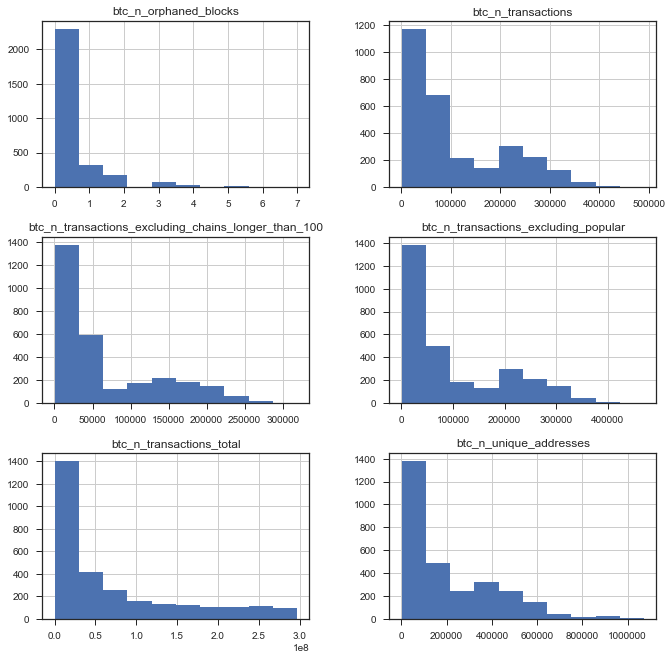

In [19]:
data[data.dtypes[(data.dtypes=="float")].index.values].hist(figsize=[20,20])
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[11,11])

The plots indicate the distribution of the data. The distribution is helpful in understanding the structure of the data and deciding on the scaling that needs to be undertaken on the data. 
The plotting of the variables indicate that the data is distributed in various scales. 
There is a need to bring the variables on a similar scale, as not doing so will result in supperssion of weaker variables.



## Finding the null values in the dataset

In [26]:
data.isnull().sum()  

btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transactions                                      0
btc_n_transact

## Addressing Missing Values
We will be using fillna function which 'pad' method to address the missing value. This is similar to forward filling. As the nature of data is incremental in nature, i.e it is increasing over time. Forwardfill will be the best method to fill the missing values, as the values will atleast remain the same as we go forward. They will not decrement

In [8]:
data = data.fillna(method='pad')

## Spliting into Train and Test
We are first spliting the training data set into training and testing to test for accuracy of our models.
For this we will be using train_test_split.

In [310]:
# Selecting the X variables and Y variables

data_X_full=data[['btc_total_bitcoins','btc_market_cap','btc_trade_volume',
'btc_blocks_size','btc_avg_block_size','btc_n_orphaned_blocks','btc_n_transactions_per_block',
'btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue','btc_transaction_fees',
'btc_cost_per_transaction_percent','btc_cost_per_transaction','btc_n_unique_addresses','btc_n_transactions',
'btc_n_transactions_total','btc_n_transactions_excluding_popular',
'btc_n_transactions_excluding_chains_longer_than_100','btc_output_volume','btc_estimated_transaction_volume',
                                        'btc_estimated_transaction_volume_usd']]

data_Y=data['btc_market_price']

# split into train and test

data_train_x_full, data_test_x_full, data_train_y, data_test_y = train_test_split(data_X_full, data_Y
                                                                        , test_size=0.33, random_state=12)

## Scaling
We will be scaling the data to standardize the range of independent variables before feature selection. As the independent variables are on different scale it gets difficult to find the weightage of each variable in explaining the variance in the dependent variable. Hence we are performing scaling.We are using different type of scaling.



## Min Max Scaling on full data

In [311]:
# Importing MinMaxScaler and initializing it

# Scaling the data (MIN MAX Scaling)
min_max_scaler = preprocessing.MinMaxScaler()
data_train_x_full_scaled = min_max_scaler.fit_transform(data_train_x_full)
data_test_x_full_scaled = min_max_scaler.fit_transform(data_test_x_full)


## Feature selection
feature selection is used to find out which independent variable is having the highest weightage in explaining the variance in the dependent variable. We are considering the first 7 models with highest weightage. As we will increase anymore variables, R^2 will increase

## Selecting variables resulted from Featured Selection

We are running three different tree different scaling methonds, and then running regression on the data to decide on the the best method to scale the data. 



In [324]:
## Selecting variables resulted from featured selection
data_X=data[['btc_blocks_size', 'btc_hash_rate',
       'btc_transaction_fees', 'btc_cost_per_transaction',
       'btc_n_transactions_total', 'btc_estimated_transaction_volume_usd']]
data_Y=data['btc_market_price']

# Spliting down both train and test data set

data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(data_X, data_Y
                                                                        , random_state=12)

## Min Max Scaling after Feature Selection

In [325]:
# Scaling the data (MIN MAX Scaling)
min_max_scaler = preprocessing.MinMaxScaler()
data_train_x_scaled = min_max_scaler.fit_transform(data_train_x)
data_test_x_scaled = min_max_scaler.fit_transform(data_test_x)


## Standardization  Scaling

In [326]:
# Scaling the data  ( Standardization  scaling) this is much better then min max when we are doing KNN 
Standard_scaler = preprocessing.StandardScaler()
data_train_x_std = Standard_scaler.fit_transform(data_train_x)
data_test_x_std = Standard_scaler.fit_transform(data_test_x)

## Normalize Scaling

In [327]:
## Scaling data (Normalize scaling)

data_train_x_norm = preprocessing.normalize(data_train_x)
data_test_x_norm = preprocessing.normalize(data_test_x)

## 2. Modeling

## a. Linear Regression
We are using linear regression with min max scaled data, Standardize data and normalize data. Just want to check whether how linear model is performing when we are considering different scaling data. 

In [328]:
# Linear Regression with Min_Max_Scaler

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
#regr = linear_model.LinearRegression()

# Train the model using the training sets (Standartize )
#regr.fit(data_train_x_scaled, data_train_y)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(data_train_x_scaled, data_train_y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(data_train_x_scaled, data_train_y)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(data_test_x_scaled, data_test_y)))


linear model coeff (w): [ 14365.80798245   6113.54995059    736.37684733   3525.9784961
 -15333.8197819   12742.74366395]
linear model intercept (b): -44.496
R-squared score (training): 0.974
R-squared score (test): 0.958


In [329]:
## Linear regression with standard scalar

linreg1 = LinearRegression().fit(data_train_x_std, data_train_y)

print('linear model coeff (w): {}'
     .format(linreg1.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg1.score(data_train_x_std, data_train_y)))
print('R-squared score (test): {:.3f}'
     .format(linreg1.score(data_test_x_std, data_test_y)))

linear model coeff (w): [ 4061.31895193   826.17834623    58.27048522   449.4800881  -4295.45318359
  1295.82115926]
linear model intercept (b): 844.971
R-squared score (training): 0.974
R-squared score (test): 0.973


In [330]:
# Linear Regression with Normalize data

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
#regr = linear_model.LinearRegression()

# Train the model using the training sets (Standartize )
#regr.fit(data_train_x_scaled, data_train_y)

from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression().fit(data_train_x_norm, data_train_y)

print('linear model coeff (w): {}'
     .format(linreg2.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg2.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg2.score(data_train_x_norm, data_train_y)))
print('R-squared score (test): {:.3f}'
     .format(linreg2.score(data_test_x_norm, data_test_y)))

linear model coeff (w): [  5.58433025e+06   1.56433879e+05   1.83847277e+07   1.97493519e+07
  -1.74397721e+04  -1.11345494e+04]
linear model intercept (b): 17741.574
R-squared score (training): 0.524
R-squared score (test): 0.516


##### So we considered 2 things while deciding about which scaling to use.
1. While exploring data we came to know that data is exponentially increasing and for that Min max scaling is 
appropriate
2. Based on the above results it is appropriate to use Min_Max scaling as it is giving us the better results

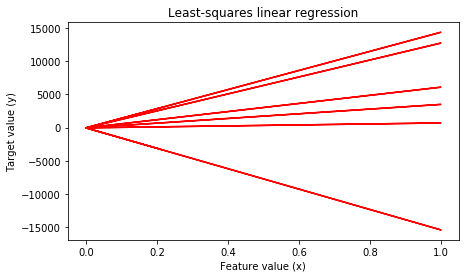

In [331]:
plt.figure(figsize=(7,4))
## plt.scatter(data_train_x_scaled, data_train_y, marker= 'o', s=50, alpha=0.8)
plt.plot(data_train_x_scaled, linreg.coef_ * data_train_x_scaled + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## b. KNN Regressor
Using KNN regressor for predicting the value based on K nearest neighbor. 

In [332]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation

param_grid=[{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
knn=KNeighborsRegressor()

## Using Grid search for exhaustive searching

grid_search = GridSearchCV( knn,param_grid, cv = 10, scoring='explained_variance', return_train_score=True)
grid_search.fit(data_train_x_scaled, data_train_y)

## Displaying the best estimator and best score for the above grid search

print(grid_search.best_estimator_)
print(grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')
0.989132262708


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0077,0.0062,0.987377,1.000000,1,{'n_neighbors': 1},13,0.984861,1.000000,0.991043,...,0.976226,1.000000,0.990428,1.000000,0.993551,1.000000,1.900087e-03,0.002993,0.006210,0.000000
1,0.0072,0.0061,0.988252,0.996211,2,{'n_neighbors': 2},8,0.983071,0.996590,0.987957,...,0.986340,0.996573,0.988250,0.995677,0.991547,0.996131,1.077114e-03,0.001446,0.002843,0.000300
2,0.0059,0.0047,0.988007,0.994560,3,{'n_neighbors': 3},10,0.986202,0.995444,0.986987,...,0.986229,0.994507,0.985997,0.994486,0.990121,0.994501,8.306625e-04,0.001100,0.002763,0.000374
3,0.0048,0.0044,0.989132,0.993464,4,{'n_neighbors': 4},1,0.989675,0.993514,0.989264,...,0.986380,0.994036,0.987293,0.993399,0.991317,0.993232,8.717768e-04,0.000663,0.003228,0.000263
4,0.0051,0.0055,0.988469,0.993098,5,{'n_neighbors': 5},5,0.990461,0.992767,0.986726,...,0.983901,0.994228,0.987956,0.993400,0.989663,0.993396,1.135892e-03,0.002247,0.003925,0.000540
5,0.0050,0.0083,0.988646,0.992165,6,{'n_neighbors': 6},3,0.987304,0.992096,0.986609,...,0.982640,0.993738,0.990407,0.992524,0.989335,0.992060,8.943624e-04,0.011577,0.004453,0.000596
6,0.0040,0.0064,0.988938,0.991466,7,{'n_neighbors': 7},2,0.991146,0.991717,0.985388,...,0.982390,0.992848,0.990707,0.991906,0.989062,0.991415,4.471812e-04,0.008880,0.004968,0.000652
7,0.0035,0.0033,0.988525,0.991034,8,{'n_neighbors': 8},4,0.989382,0.990567,0.983340,...,0.982312,0.992075,0.991324,0.991617,0.987785,0.990930,5.000592e-04,0.000458,0.005394,0.000529
8,0.0035,0.0045,0.988219,0.990671,9,{'n_neighbors': 9},9,0.988808,0.990007,0.981788,...,0.983154,0.991988,0.991551,0.990613,0.985852,0.990475,5.000592e-04,0.003529,0.005648,0.000605
9,0.0030,0.0033,0.988338,0.990399,10,{'n_neighbors': 10},7,0.987602,0.990063,0.982259,...,0.983368,0.991298,0.991505,0.990653,0.985791,0.990228,9.536743e-08,0.000458,0.005359,0.000538


##### Based on the best estimator we came to know that for K=4 we are getting best output.
##### Using the same for prediction and checking the accuracy.

In [333]:
knnreg = KNeighborsRegressor(n_neighbors=4)
knnreg.fit(data_train_x_scaled,data_train_y) 
knnreg.score(data_test_x_scaled, data_test_y, sample_weight=None)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knnreg.score(data_train_x_scaled, data_train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knnreg.score(data_test_x_scaled, data_test_y)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


## Plotting the accuracy for KNN
Lets plot the accuracy for different K values to see how accuracy is changing for different values of K

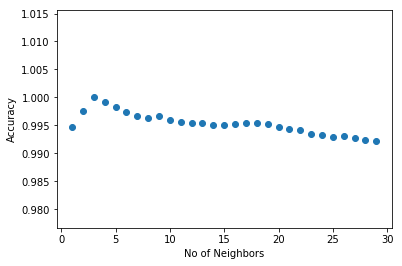

In [347]:
knn_range = range(1,30)
scores = []

for k in knn_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(data_train_x_scaled, data_train_y)
    scores.append(knn.score(data_test_x_scaled, data_test_y))

plt.figure()
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.scatter(knn_range, scores)
plt.xticks([0,5,10,15,20,25,30]);
plt.show()

## Ridge Regression
As this is a time series data their is a high probability of multicollinearity. If there is multicollinearity then least square estimates are unbiased, but their variances are large so they may be far from orginal values.Ridge adds a degree of baised to the regression estimates thus reducing the standard error.

In [335]:
########## ridge regression ##########

linridge = Ridge(alpha=20.0).fit(data_train_x_scaled, data_train_y)

print('Bitcoin dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(data_train_x_scaled, data_train_y)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(data_test_x_scaled, data_test_y)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

alpha=[{'alpha':[1e-15,1e-10, 1e-5, 1e-2,1e-1, 0, 1, 5, 10,100, 1000]}]
ridge=Ridge()
grid_search = GridSearchCV(ridge,alpha, cv = 10, scoring='explained_variance', return_train_score=True)
grid_search.fit(data_train_x_scaled, data_train_y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_)

Bitcoin dataset
ridge regression linear model intercept: -342.58601344427063
ridge regression linear model coeff:
[  640.28351468  4336.04218807  1967.23209542  4225.37561681   670.01605078
  4880.76154083]
R-squared score (training): 0.907
R-squared score (test): 0.934
Number of non-zero features: 6
Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
0.973828556636


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.010301,0.0016,0.973828,0.974194,1e-15,{'alpha': 1e-15},3,0.976744,0.973819,0.976125,...,0.959587,0.975965,0.971299,0.974363,0.976427,0.973878,0.014961,4.899500e-04,0.008067,0.001057
1,0.005100,0.0014,0.973828,0.974194,1e-10,{'alpha': 1e-10},2,0.976744,0.973819,0.976125,...,0.959587,0.975965,0.971299,0.974363,0.976427,0.973878,0.001044,4.899306e-04,0.008067,0.001057
2,0.003500,0.0010,0.973829,0.974194,1e-05,{'alpha': 1e-05},1,0.976744,0.973819,0.976124,...,0.959587,0.975965,0.971298,0.974363,0.976429,0.973878,0.002872,4.472345e-04,0.008068,0.001057
3,0.002700,0.0009,0.973816,0.974099,0.01,{'alpha': 0.01},5,0.976562,0.973729,0.975935,...,0.958990,0.975894,0.970897,0.974275,0.977422,0.973754,0.000781,2.999942e-04,0.008337,0.001067
4,0.003000,0.0012,0.973429,0.973616,0.1,{'alpha': 0.1},6,0.976350,0.973264,0.975381,...,0.958191,0.975522,0.969723,0.973836,0.977955,0.973140,0.000632,4.000902e-04,0.008676,0.001114
5,0.005900,0.0010,0.973828,0.974194,0,{'alpha': 0},3,0.976744,0.973819,0.976125,...,0.959587,0.975965,0.971299,0.974363,0.976427,0.973878,0.006074,1.168008e-07,0.008067,0.001057
6,0.002700,0.0010,0.971655,0.971557,1,{'alpha': 1},7,0.977078,0.971115,0.972709,...,0.956788,0.973324,0.965687,0.971882,0.974719,0.971195,0.000640,1.092571e-07,0.009349,0.001097
7,0.002600,0.0007,0.957921,0.957312,5,{'alpha': 5},8,0.966850,0.956428,0.955724,...,0.939588,0.958796,0.947392,0.957917,0.962886,0.957596,0.000663,4.583180e-04,0.012876,0.001113
8,0.002500,0.0033,0.938709,0.937921,10,{'alpha': 10},9,0.948335,0.936711,0.933520,...,0.917809,0.939366,0.924811,0.938793,0.948129,0.938680,0.000500,7.239905e-03,0.016181,0.001347
9,0.002600,0.0007,0.719151,0.716439,100,{'alpha': 100},10,0.718181,0.715561,0.686444,...,0.695544,0.716758,0.687175,0.719495,0.764991,0.717750,0.000490,4.583024e-04,0.032583,0.004066


## Lasso Regression
Performing Lasso Regression to remove the multicollinearity in the model. It does so by moving the variables toward zero. 

In [356]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(data_train_x_scaled, data_train_y)

print('Bitcoin dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(data_train_x_scaled, data_train_y)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(data_test_x_scaled, data_test_y)))
print('Features with non-zero weight (sorted by absolute magnitude):')

alpha=[{'alpha':[ 1, 5, 10,100, 1000, 100000]}]
lasso=Lasso()
grid_search = GridSearchCV(lasso,alpha, cv = 10, scoring='explained_variance', return_train_score=True)
grid_search.fit(data_train_x_scaled, data_train_y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_)

Bitcoin dataset
lasso regression linear model intercept: -111.59207832177538
lasso regression linear model coeff:
[    -0.           5749.47012421      0.           3032.00063994
   -498.25324925  13107.12354622]
Non-zero features: 4
R-squared score (training): 0.973
R-squared score (test): 0.974

Features with non-zero weight (sorted by absolute magnitude):
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.97337880239


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.01475,0.00150,9.733788e-01,0.973362,1,{'alpha': 1},1,0.976149,0.973025,9.752277e-01,...,0.957629,0.975343,9.690159e-01,0.973617,9.796340e-01,0.972808,1.126133e-02,0.001225,8.945666e-03,0.001136
1,0.00725,0.00125,9.718901e-01,0.971647,5,{'alpha': 5},2,0.976380,0.971276,9.737961e-01,...,0.956831,0.973582,9.641320e-01,0.971942,9.811207e-01,0.971141,2.839389e-03,0.001250,9.730479e-03,0.001122
2,0.00525,0.00125,9.698526e-01,0.969301,10,{'alpha': 10},3,0.976114,0.968919,9.707018e-01,...,0.955466,0.971178,9.584594e-01,0.969687,9.805039e-01,0.968602,1.749948e-03,0.001250,1.075503e-02,0.001135
3,0.00975,0.00100,7.654926e-01,0.761101,100,{'alpha': 100},4,0.758361,0.757235,7.194043e-01,...,0.740817,0.759029,7.245579e-01,0.765118,8.282551e-01,0.769776,1.750030e-03,0.001225,4.340215e-02,0.009694
4,0.00275,0.00125,3.322007e-17,0.000000,1000,{'alpha': 1000},5,0.000000,0.000000,1.110223e-16,...,0.000000,0.000000,-2.220446e-16,0.000000,2.220446e-16,0.000000,7.500808e-04,0.001250,1.220856e-16,0.000000
5,0.00250,0.00100,3.322007e-17,0.000000,100000,{'alpha': 100000},5,0.000000,0.000000,1.110223e-16,...,0.000000,0.000000,-2.220446e-16,0.000000,2.220446e-16,0.000000,1.092571e-07,0.001225,1.220856e-16,0.000000


## Lasso Regression with Regularization Parameter: Alpha

In [352]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5,6,8, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(data_train_x_scaled, data_train_y)
    r2_train = linlasso.score(data_train_x_scaled, data_train_y)
    r2_test = linlasso.score(data_test_x_scaled, data_test_y)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    
alpha=[{'alpha':[1e-15,1e-10, 1e-5, 1e-2,1e-1, 0, 1, 5, 6, 8, 10,100, 1000]}]
ridge=Ridge()
grid_search = GridSearchCV(ridge,alpha, cv = 10, scoring='explained_variance', return_train_score=True)
grid_search.fit(data_train_x_scaled, data_train_y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_)

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 5, r-squared training: 0.97, r-squared test: 0.97

Alpha = 1.00
Features kept: 4, r-squared training: 0.97, r-squared test: 0.97

Alpha = 2.00
Features kept: 4, r-squared training: 0.97, r-squared test: 0.97

Alpha = 3.00
Features kept: 4, r-squared training: 0.97, r-squared test: 0.97

Alpha = 5.00
Features kept: 5, r-squared training: 0.97, r-squared test: 0.97

Alpha = 6.00
Features kept: 5, r-squared training: 0.97, r-squared test: 0.97

Alpha = 8.00
Features kept: 3, r-squared training: 0.97, r-squared test: 0.97

Alpha = 10.00
Features kept: 3, r-squared training: 0.97, r-squared test: 0.98

Alpha = 20.00
Features kept: 3, r-squared training: 0.96, r-squared test: 0.98

Alpha = 50.00
Features kept: 4, r-squared training: 0.92, r-squared test: 0.95

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None,

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.00675,0.00200,0.973828,0.974194,1e-15,{'alpha': 1e-15},3,0.976744,0.973819,0.976125,...,0.959587,0.975965,0.971299,0.974363,0.976427,0.973878,5.250159e-03,0.002179,0.008067,0.001057
1,0.00450,0.00450,0.973828,0.974194,1e-10,{'alpha': 1e-10},2,0.976744,0.973819,0.976125,...,0.959587,0.975965,0.971299,0.974363,0.976427,0.973878,1.499947e-03,0.008573,0.008067,0.001057
2,0.00450,0.00100,0.973829,0.974194,1e-05,{'alpha': 1e-05},1,0.976744,0.973819,0.976124,...,0.959587,0.975965,0.971298,0.974363,0.976429,0.973878,2.179467e-03,0.001225,0.008068,0.001057
3,0.00325,0.00125,0.973816,0.974099,0.01,{'alpha': 0.01},5,0.976562,0.973729,0.975935,...,0.958990,0.975894,0.970897,0.974275,0.977422,0.973754,1.145670e-03,0.001250,0.008337,0.001067
4,0.00350,0.00150,0.973429,0.973616,0.1,{'alpha': 0.1},6,0.976350,0.973264,0.975381,...,0.958191,0.975522,0.969723,0.973836,0.977955,0.973140,1.224812e-03,0.001225,0.008676,0.001114
5,0.00325,0.00075,0.973828,0.974194,0,{'alpha': 0},3,0.976744,0.973819,0.976125,...,0.959587,0.975965,0.971299,0.974363,0.976427,0.973878,1.145722e-03,0.001146,0.008067,0.001057
6,0.00350,0.00050,0.971655,0.971557,1,{'alpha': 1},7,0.977078,0.971115,0.972709,...,0.956788,0.973324,0.965687,0.971882,0.974719,0.971195,1.224753e-03,0.001000,0.009349,0.001097
7,0.00250,0.00150,0.957921,0.957312,5,{'alpha': 5},8,0.966850,0.956428,0.955724,...,0.939588,0.958796,0.947392,0.957917,0.962886,0.957596,1.430511e-07,0.001225,0.012876,0.001113
8,0.00350,0.00150,0.954143,0.953477,6,{'alpha': 6},9,0.963366,0.952514,0.951293,...,0.935137,0.954948,0.942822,0.954139,0.959986,0.953872,1.224783e-03,0.001225,0.013620,0.001147
9,0.00300,0.00100,0.946461,0.945718,8,{'alpha': 8},10,0.956005,0.944621,0.942399,...,0.926371,0.947174,0.933755,0.946489,0.954101,0.946308,1.000011e-03,0.001225,0.014974,0.001236


## Polynomial Regression
Now we transform the original input data to add polynomial features up to degree 3 (quadratic)

In [349]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
Data_x_poly = poly.fit_transform(data_X)

X_train, X_test, y_train, y_test = train_test_split(Data_x_poly, data_Y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))



(poly deg 2) linear model coeff (w):
[ -1.27057915e-04  -1.85489271e-04  -9.11721076e-04  -7.14409985e-05
   2.46452041e-05   5.98266709e-06  -8.88480196e-07  -1.02038616e-05
   1.70569738e-07   1.83437638e-04   9.86418170e-04   1.04697781e-08
  -6.17834828e-10  -8.04019222e-12   3.74688333e-07  -4.12295422e-06
  -8.48313932e-11   3.45926765e-14   2.75067844e-03  -4.25452679e-02
  -9.56468829e-08  -1.78202956e-09  -3.43887095e-03  -1.35710956e-07
   1.65343034e-08  -2.69721599e-12   3.26655478e-13  -6.30328038e-17]
(poly deg 2) linear model intercept (b): -5.411
(poly deg 2) R-squared score (training): 0.992
(poly deg 2) R-squared score (test): 0.987



## Ploynomial with Regression
Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge regression

In [357]:
X_train, X_test, y_train, y_test = train_test_split(Data_x_poly, data_Y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[  0.00000000e+00   2.17578677e-02  -8.77399038e-04   5.65779715e-01
   9.12696507e-01  -5.25913193e-06  -9.89672952e-07  -3.81171545e-05
   1.68133913e-07  -2.74726027e-05  -4.50552660e-03   3.98567436e-08
  -4.95289313e-10  -1.17238172e-11   2.85893885e-07  -2.70577524e-06
  -8.34992121e-11   1.44385260e-14   2.30976033e-03  -3.11442901e-02
   1.39770665e-08  -1.82386888e-09  -1.63888546e-01   2.70786713e-06
   1.94200014e-08  -1.04360605e-11   2.63625498e-13  -7.61127716e-17]
(poly deg 2 + ridge) linear model intercept (b): -1.209
(poly deg 2 + ridge) R-squared score (training): 0.992
(poly deg 2 + ridge) R-squared score (test): 0.987


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.008301342578208e-40 / 1.1102230246251565e-16
  RuntimeWarning)


## Multi-class classification with Linear Models
## LinearSVC with M classes generates M one vs rest classifiers

In [ ]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(data_train_x_scaled, data_train_y,
                                                   random_state = 10)

clf = SVR(C=20).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVR on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVR on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVR
param = { 'C': [  1, 10],'gamma': [ 0.1, 1],'epsilon' : [ 0.1, 1] }
svm = GridSearchCV(SVR(), param, cv=10, return_train_score=True, n_jobs=2)
svm.fit(data_train_x_scaled,data_train_y)

print('Best parameters for SVM {}'.format(svm.best_params_))

trainScore = svm.score(data_train_x_scaled, data_train_y)
testScore = svm.score(data_test_x_scaled, data_test_y)


results = results.append(pd.Series({'Model':'SVM','Train Rsquare':trainScore, 'Test Rsquare':testScore}),ignore_index=True )
results

In [134]:
# Make predictions using the testing set
data_test_y = regr.predict(data_test_x_scaled)

In [137]:
# Make predictions using the testing set
data_test_y = regr.predict(data_test_x_scaled)
#### Finding Score
regr.score(data_test_x_scaled, data_test_y, sample_weight=None)

1.0

In [124]:
from sklearn import cross_validation
import numpy as np
score2 = cross_validation.cross_val_score(regr,data_test_x, data_test_y,cv=5)
score2

array([ 1.,  1.,  1.,  1.,  1.])

In [140]:
########## KNN regressor ##############
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_train_x_scaled,data_train_y) 
knn.score(data_test_x_scaled, data_test_y, sample_weight=None)

0.98946119839524471

In [142]:
########## KNN regressor ##############
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_train_x_scaled,data_train_y) 
knn.score(data_test_x_scaled, data_test_y, sample_weight=None)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(data_train_x_scaled, data_train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(data_test_x_scaled, data_test_y)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.99


In [144]:
from sklearn.neighbors import KNeighborsRegressor


knnreg = KNeighborsRegressor(n_neighbors = 5).fit(data_train_x_scaled, data_train_y)

print(knnreg.predict(data_test_x_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(data_test_x_scaled, data_test_y)))

[  0.00000000e+00   1.10840000e+02   5.82620000e+02   1.02571000e+02
   5.16102000e+02   4.25306000e+02   5.86138593e+02   1.13220000e-01
   1.16811973e+04   1.21211480e+01   9.78781600e-01   8.66029600e-01
   4.81420603e+02   0.00000000e+00   3.69018000e+02   1.14488406e+02
   2.50346000e+02   8.39583477e+02   9.61448720e+01   4.03816849e+03
   4.44238000e+02   5.25213000e+00   1.13477488e+03   7.49386000e+00
   5.27910000e+02   2.48558000e+02   1.05530690e+03   2.74270000e+02
   0.00000000e+00   0.00000000e+00   6.79715833e+02   1.02823650e+02
   3.71164000e+02   7.71560000e+02   2.78934000e+02   1.16639707e+03
   2.46350000e+02   8.29598813e+02   5.13319383e+02   1.11278509e+04
   2.58422000e+02   7.99546000e+02   8.24020000e-02   5.27910000e+02
   5.95938000e+02   6.23672000e-02   5.55172600e+02   9.25574140e+01
   1.18151520e+01   4.04810000e+02   6.33935800e+00   6.51910615e+02
   6.16947800e+00   6.36794000e+02   2.47638000e+02   5.22057800e+00
   3.55359400e-01   5.16202000e+02

In [ ]:
from sklearn import feature_selection
# Create linear regression object
regr_stepwise = feature_selection.LinearRegression()
# Train the model using the training sets (Standartize)
regr_stepwise.fit(data_train_x, data_train_y)

In [ ]:
predictions = model.predict(X) # make the predictions by the model